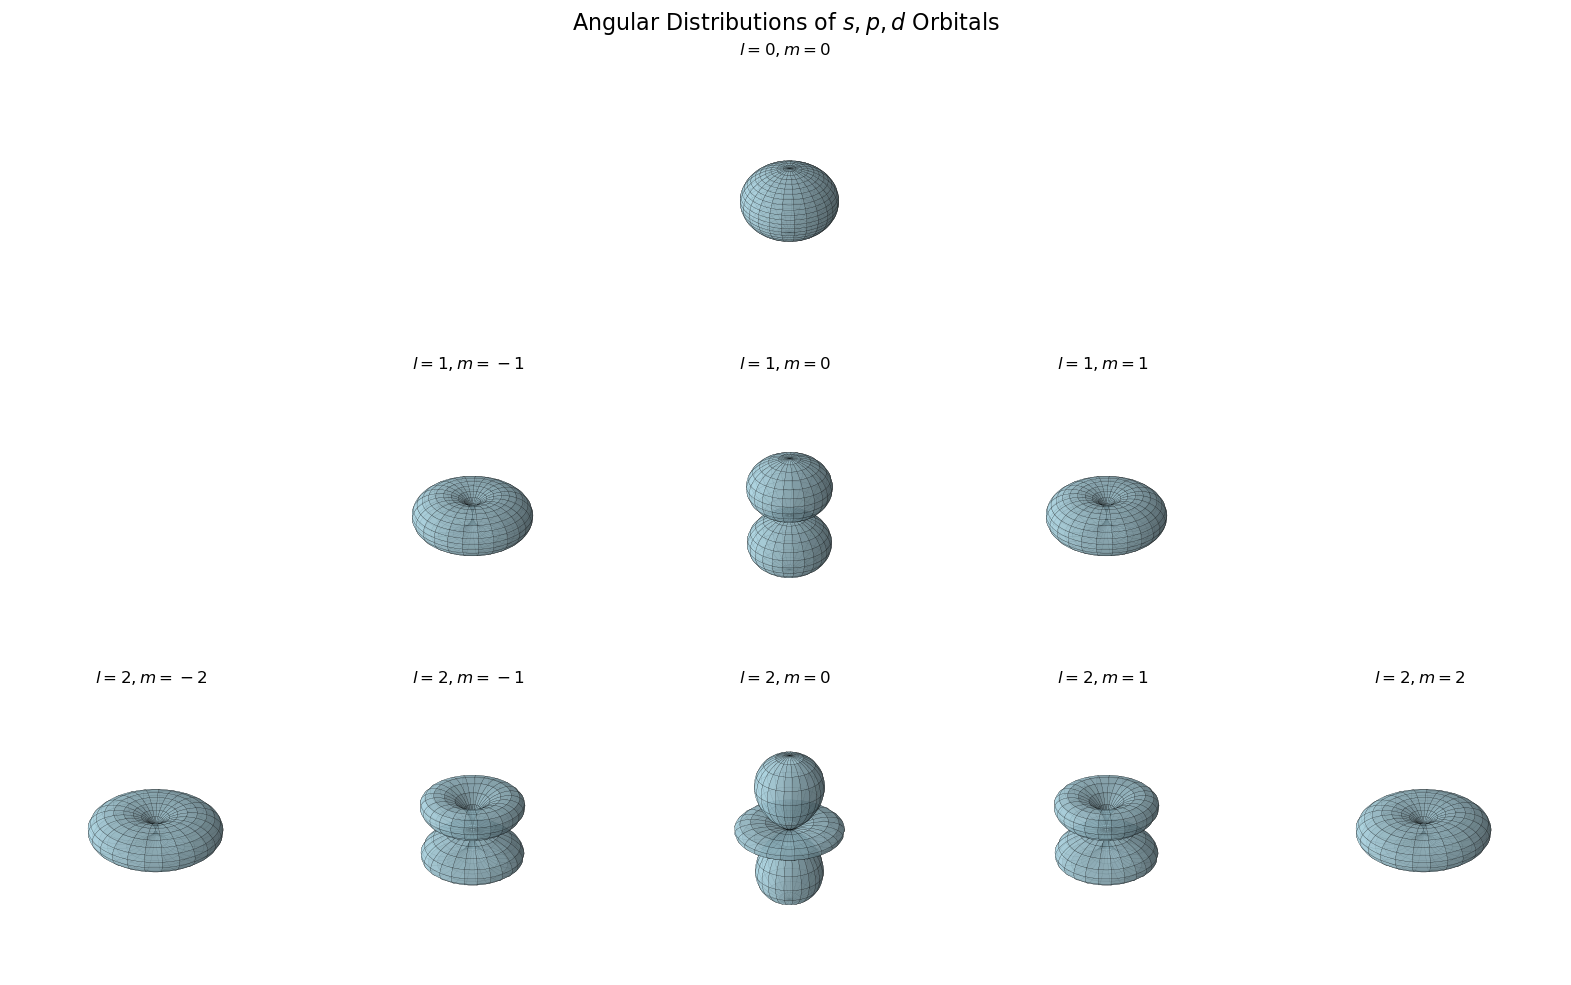

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

def plot_all_orbitals_uniform():
    # Set up the angle grid (theta is polar, phi is azimuthal)
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2 * np.pi, 100)
    theta, phi = np.meshgrid(theta, phi)

    # Prepare a 3-row grid for s, p, and d orbitals
    fig = plt.figure(figsize=(16, 10))
    
    # Orbital configurations: (angular momentum l, magnetic m, plot row, plot col)
    orbitals = []
    orbitals.append((0, 0, 1, 3))  # s-orbital centered
    for m in range(-1, 2):         # p-orbitals
        orbitals.append((1, m, 2, m + 3))
    for m in range(-2, 3):         # d-orbitals
        orbitals.append((2, m, 3, m + 3))

    # Single colour for all orbitals
    orbital_color = 'lightblue'

    for l, m, row, col in orbitals:
        # Create 3D subplot in the grid
        ax = fig.add_subplot(3, 5, (row - 1) * 5 + col, projection='3d')
        
        # Calculate spherical harmonic magnitude
        y_lm = sph_harm(m, l, phi, theta)
        r = np.abs(y_lm)
        
        # Convert to Cartesian coordinates for display (spherical coords originally)
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        
        # Plot the orbital surface with the same light blue color
        ax.plot_surface(x, y, z, color=orbital_color, 
                        edgecolor='black', linewidth=0.1, 
                        rstride=4, cstride=4, antialiased=True, alpha=0.7)
        
        ax.set_title(f"$l={l}, m={m}$")
        ax.set_axis_off()
        
        # Set consistent viewing limits to keep shapes proportional
        limit = 0.5
        ax.set_xlim([-limit, limit])
        ax.set_ylim([-limit, limit])
        ax.set_zlim([-limit, limit])

    plt.suptitle("Angular Distributions of $s, p, d$ Orbitals", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_all_orbitals_uniform()